<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/04Apr20_4_sample_statistics_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Statistics Lab

### Introduction

In this lab, we'll use calculate some sampling statistics for the NYC regents exam using both an analytical and computational approach.

### Loading our Sample

In [0]:
!pip install gcsfs

In [0]:
import pandas as pd
url = "gs://curriculum-assets/mod-2/NYC_Regents_Exam_Results.csv"
df = pd.read_csv(url, index_col = 0)

In [0]:
df.columns

Index(['School DBN', 'School Name', 'School Type', 'School Level',
       'Regents Exam', 'Year', 'Category', 'Total Tested', 'Mean Score',
       'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')

In [0]:
df['Year'].value_counts()

2016    7555
2015    7103
2017    6177
2019    6163
2018    6033
Name: Year, dtype: int64

In [0]:
df[df['Year'] == 2019]['School Level'].value_counts()

High school                        3995
Secondary School                    895
Junior High-Intermediate-Middle     643
K-8                                 314
K-12 all grades                     313
Ungraded                              2
Elementary                            1
Name: School Level, dtype: int64

Let's select just those results from 2019 taken in the common core algebra from students in High School.

In [0]:
selected_df = df[(df['Year'] == 2019) 
                 & (df['School Level'] == 'High school') 
                 & (df['Regents Exam'] == 'Common Core Algebra')] 

In [0]:
selected_df.shape

# (424, 17)

(424, 17)

The missing values are indicated as an `'s'`.  Calculate the number of missing values are in the mean score column.

In [0]:
selected_df[:5]

# 17

,School DBN,School Name,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
Unnamed Column,,,,,,,,,,,,,,,,,
01M2922019All StudentsCommon Core Algebra,01M292,Orchard Collegiate Academy,General Academic,High school,Common Core Algebra,2019,All Students,111,68.9,32,28.8,79,71.2,14,12.6,65,58.6
01M4482019All StudentsCommon Core Algebra,01M448,University Neighborhood High School,General Academic,High school,Common Core Algebra,2019,All Students,169,70.0,57,33.7,112,66.3,56,33.1,97,57.4
01M4582019All StudentsCommon Core Algebra,01M458,Forsyth Satellite Academy,Transfer School,High school,Common Core Algebra,2019,All Students,7,45.3,7,100.0,0,0.0,0,0.0,0,0.0
01M5092019All StudentsCommon Core Algebra,01M509,Marta Valle High School,General Academic,High school,Common Core Algebra,2019,All Students,56,60.2,35,62.5,21,37.5,1,1.8,11,19.6
01M5152019All StudentsCommon Core Algebra,01M515,Lower East Side Preparatory High School,Transfer School,High school,Common Core Algebra,2019,All Students,158,68.0,56,35.4,102,64.6,33,20.9,76,48.1


In [0]:
(selected_df['Mean Score'] == 's').sum()

17

> We see that we have 17 missing values. 

In [0]:
17/424

0.04009433962264151

### Computing Sample Statistics

From this let's draw a sample and compute some sample statistics.  We'll sample 100 schools from our dataset.

Let's remove from the dataset those who have a value of `s`, as we will not be able to calculate statistics from these schools.

In [0]:
reduced_df = selected_df[~(selected_df['Mean Score'] == 's')]

In [0]:
reduced_df.shape
# (407, 17)

(407, 17)

Then we can sample our data.

In [0]:
sampled_df = reduced_df.sample(n=100, random_state=1)

In [0]:
sampled_df.shape

(100, 17)

In [0]:
sampled_df[:2]

,School DBN,School Name,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
Unnamed Column,,,,,,,,,,,,,,,,,
31R0642019All StudentsCommon Core Algebra,31R064,Gaynor McCown Expeditionary Learning School,General Academic,High school,Common Core Algebra,2019,All Students,122,69.8,37,30.3,85,69.7,35,28.7,73,59.8
03M3072019All StudentsCommon Core Algebra,03M307,"Urban Assembly School for Media Studies, The",General Academic,High school,Common Core Algebra,2019,All Students,136,62.4,67,49.3,69,50.7,4,2.9,46,33.8


Now that we have removed missing data and selected our sample, it's time to calculate our sample statistics.  

Let's take a look at our dtype of our mean.

In [0]:
hs_avg_series = sampled_df['Mean Score']
hs_avg_series.dtype

dtype('O')

We can see that our mean score is of type object, so let's change it to a numeric datatype.

In [0]:
import numpy as np
hs_avg_series_num = hs_avg_series.astype(np.float64)

hs_avg_series_num.dtype
# dtype('float64')

dtype('float64')

Let's assign this coerced column to our `sampled_df`, change the name of the column to `avg_test_score`, and drop the original `Mean Score` column.

In [0]:
sampled_df.columns

Index(['School DBN', 'School Name', 'School Type', 'School Level',
       'Regents Exam', 'Year', 'Category', 'Total Tested', 'Mean Score',
       'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')

In [0]:
# Dropping Mean Score
sampled_df = sampled_df.drop('Mean Score', axis=1)
sampled_df.columns 


Index(['School DBN', 'School Name', 'School Type', 'School Level',
       'Regents Exam', 'Year', 'Category', 'Total Tested',
       'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')

In [0]:
sampled_df['avg_test_score'] = hs_avg_series_num

In [0]:
'Mean Score' in sampled_df.columns

False

In [0]:
sampled_df['avg_test_score'][:3]
# Unnamed Column
# 31R0642019All StudentsCommon Core Algebra    69.8
# 03M3072019All StudentsCommon Core Algebra    62.4
# 26Q4352019All StudentsCommon Core Algebra    63.5
# Name: avg_test_score, dtype: float64


Unnamed Column
31R0642019All StudentsCommon Core Algebra    69.8
03M3072019All StudentsCommon Core Algebra    62.4
26Q4352019All StudentsCommon Core Algebra    63.5
Name: avg_test_score, dtype: float64

### Analytic Sample Statistics

Let's start by plotting a distribution of the high school avg scores in our sample.

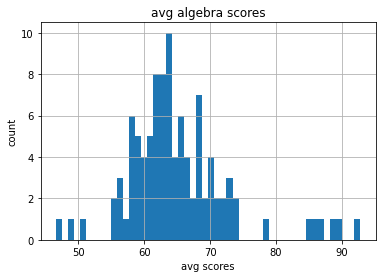

In [0]:
import matplotlib.pyplot as plt

ax = sampled_df['avg_test_score'].plot.hist(bins=50)
ax.set(title='avg algebra scores', xlabel='avg scores', ylabel='count')
plt.grid()


> Answer: <img src="https://github.com/jigsawlabs-student/sampling-statistics/blob/master/avg-scores.png?raw=1" width="50%">

Ok, now we can calculate the sample mean score on the Core Algebra exam among NYC high schools.  

In [0]:
sampled_df.columns

Index(['School DBN', 'School Name', 'School Type', 'School Level',
       'Regents Exam', 'Year', 'Category', 'Total Tested',
       'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR', 'avg_test_score'],
      dtype='object')

In [0]:
sample_mean = sampled_df['avg_test_score'].mean()
sample_mean
# 65.11

65.11899999999997

And we can calculate the sample standard deviation.

In [0]:
sample_std = sampled_df['avg_test_score'].std()

sample_std
# 7.908

7.90894768824232

> Remember that by default, pandas will provide a ddof of 1 for the standard deviation.

Now let's calculate the standard error of the sample means using the analytic approach.

In [0]:
mean_score_ser_num = sample_std/np.sqrt(len(sampled_df['avg_test_score']))

In [0]:
mean_score_ser_num.shape

()

In [0]:
import numpy as np
s_error = mean_score_ser_num

s_error
# 0.790

0.790894768824232

Now it's worth making sure that we understand the difference between the standard error and the standard deviation.  Take a moment to write it down in your own words.

The standard error tells us about the distribution of means for samples of a bunch of samples. Distribution is about the spread of a particular sample. 

One more question, what are the two components that the standard error depends on?

### Computational Sample Statistics

Now let's use a computational approach to finding our sample statistics.

We can do so by first treating our sample like the underlying population.  Then we create a set of random samples of our sample, calculate a specific sampling specific, and then finding the standard deviation in that sampling statistic to find the standard error.  Let's get started.

1. Create random samples.

Use the `np.random.choice` method to sample our data.  Each sample should be the size of our original sample, and we'll choose 1000 samples.  Assign them to the variable `samples`.

> First make sure that you understand how `choice` works.  For example we get you started by choosing three numbers between 0 and 99.  You'll want to choose 100 numbers between 0 and 99.

Assign your samples to the variable samples.

In [0]:
import numpy as np
from numpy import random
random.seed(2)
# keep the seed in here
samples = []
for i in range(1000):
  samples.append(random.choice(100, 100))


In [0]:
len(samples)

1000

In [0]:
samples[0]['avg_test_score'][:3]
# 
# 05M6922019All StudentsCommon Core Algebra    92.8
# 07X4732019All StudentsCommon Core Algebra    59.2
# 05M2852019All StudentsCommon Core Algebra    57.3
# Name: avg_test_score, dtype: float64

Unnamed Column
05M6922019All StudentsCommon Core Algebra    92.8
07X4732019All StudentsCommon Core Algebra    59.2
05M2852019All StudentsCommon Core Algebra    57.3
Name: avg_test_score, dtype: float64

Next, let's calculate the mean for each of these samples.

In [0]:
sample_means = None

In [0]:
sample_means[:2]
# [65.21399999999998, 65.87399999999998]

[65.21399999999998, 65.87399999999998]

Now calculate a mean of means, and a standard error.

In [0]:
compuational_mean = None
compuational_mean
# 65.12

65.12538799999997

In [0]:
compuational_se = None
compuational_se
# 0.7785

0.7785846039166192

Compare this to our analytic calculation of `0.790`.


Finally, let's see how we did against the underlying population.

In [0]:
None

# 64.69

64.69803439803445

In [0]:
65.12 - 64.69

0.4300000000000068

### Resources

[Sports Reference](https://sportsreference.readthedocs.io/en/stable/)

[Degrees of Freedom](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics)